# Loading Modules<a href="#Loading-Modules" class="anchor-link">¶</a>

In \[1\]:

    # Install Following libraries if you don't have one
    # !pip install wordcloud
    # !pip install tensorflow

In \[2\]:

    # Laoding basic libraries
    import re
    import nltk
    import time
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from textblob import TextBlob
    import matplotlib.pyplot as plt

    # Loading advance sklearn modules
    # Sklearn Modules
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer

    # Importing Models
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.tree import DecisionTreeRegressor

    # Importing evaluation modules
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


    # Setting environment to ignore future warnings
    import warnings
    warnings.simplefilter('ignore')

    # Downloading & Loading NLTK modelus
    nltk.download('punkt')
    nltk.download('wordnet')
    nltk.download("stopwords")
    nltk.download('maxent_ne_chunker')
    nltk.download('averaged_perceptron_tagger')

    STOPWORDS = nltk.corpus.stopwords.words("english")

    [nltk_data] Downloading package punkt to
    [nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
    [nltk_data]   Package punkt is already up-to-date!
    [nltk_data] Downloading package wordnet to
    [nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
    [nltk_data]   Package wordnet is already up-to-date!
    [nltk_data] Downloading package stopwords to
    [nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
    [nltk_data]   Package stopwords is already up-to-date!
    [nltk_data] Downloading package maxent_ne_chunker to
    [nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
    [nltk_data]   Package maxent_ne_chunker is already up-to-date!
    [nltk_data] Downloading package averaged_perceptron_tagger to
    [nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
    [nltk_data]   Package averaged_perceptron_tagger is already up-to-
    [nltk_data]       date!

# Data Loading & Exploration<a href="#Data-Loading-&amp;-Exploration" class="anchor-link">¶</a>

In \[3\]:

    df = pd.read_excel("eassy_dataset.xlsx", index_col=[0])
    df.head()

Out\[3\]:

|          | essay                                             | Manual_Score | Unnamed: 3 | Prompt |
|----------|---------------------------------------------------|--------------|------------|--------|
| essay_id |                                                   |              |            |        |
| 1        | Dear local newspaper, I think effects computer... | 8.0          | NaN        | 1      |
| 2        | Dear @CAPS1 @CAPS2, I believe that using compu... | 9.0          | NaN        | 1      |
| 3        | Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl... | 7.0          | NaN        | 1      |
| 4        | Dear Local Newspaper, @CAPS1 I have found that... | 10.0         | NaN        | 1      |
| 5        | Dear @LOCATION1, I know having computers has a... | 8.0          | NaN        | 1      |

In \[4\]:

    df.shape

Out\[4\]:

    (12978, 4)

In \[5\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 12978 entries, 1 to 12978
    Data columns (total 4 columns):
     #   Column        Non-Null Count  Dtype  
    ---  ------        --------------  -----  
     0   essay         12978 non-null  object 
     1   Manual_Score  12977 non-null  float64
     2   Unnamed: 3    0 non-null      float64
     3   Prompt        12978 non-null  int64  
    dtypes: float64(2), int64(1), object(1)
    memory usage: 507.0+ KB

In \[6\]:

    df[df.Manual_Score.isnull()]

Out\[6\]:

|          | essay                                             | Manual_Score | Unnamed: 3 | Prompt |
|----------|---------------------------------------------------|--------------|------------|--------|
| essay_id |                                                   |              |            |        |
| 6974     | When they come back, Saeng vowed silently to h... | NaN          | NaN        | 4      |

In \[7\]:

    # Statistical properties
    df.describe(include="all")

Out\[7\]:

|        | essay                                             | Manual_Score | Unnamed: 3 | Prompt       |
|--------|---------------------------------------------------|--------------|------------|--------------|
| count  | 12978                                             | 12977.000000 | 0.0        | 12978.000000 |
| unique | 12974                                             | NaN          | NaN        | NaN          |
| top    | In the setting of the essay; "Rough Road Ahead... | NaN          | NaN        | NaN          |
| freq   | 2                                                 | NaN          | NaN        | NaN          |
| mean   | NaN                                               | 6.799723     | NaN        | 4.179458     |
| std    | NaN                                               | 8.970558     | NaN        | 2.136749     |
| min    | NaN                                               | 0.000000     | NaN        | 1.000000     |
| 25%    | NaN                                               | 2.000000     | NaN        | 2.000000     |
| 50%    | NaN                                               | 3.000000     | NaN        | 4.000000     |
| 75%    | NaN                                               | 8.000000     | NaN        | 6.000000     |
| max    | NaN                                               | 60.000000    | NaN        | 8.000000     |

In \[8\]:

    # Percentage on bar
    def per_on_bar(feature, title="", limited=False, n=10):
        print("Total unique values are: ", len(feature.value_counts()), "\n\n")
        print("Category\tValue\n")
        if limited:
            data = feature.value_counts()[0:n]
        else:
            data = feature.value_counts()
        print(data)
        categories_num = len(data)
        #plotting bar-plot and pie chart
        sns.set_style('darkgrid')
        plt.figure(figsize=(16,5))
        plt.title(title, fontsize=16)
        plt.xticks(rotation=45)
        plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
        total = len(feature)
        for p in plot.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.08
            y = p.get_y() + p.get_height()
            plot.annotate(percentage, (x, y), size = 12)
        plt.show()

In \[9\]:

    per_on_bar(df.Manual_Score, limited=True, n=12)

    Total unique values are:  53 


    Category    Value

    0.0     419
    9.0     383
    10.0    372
    16.0    199
    11.0    165
    7.0     163
    40.0    161
    17.0    160
    6.0     137
    12.0    133
    Name: Manual_Score, dtype: int64

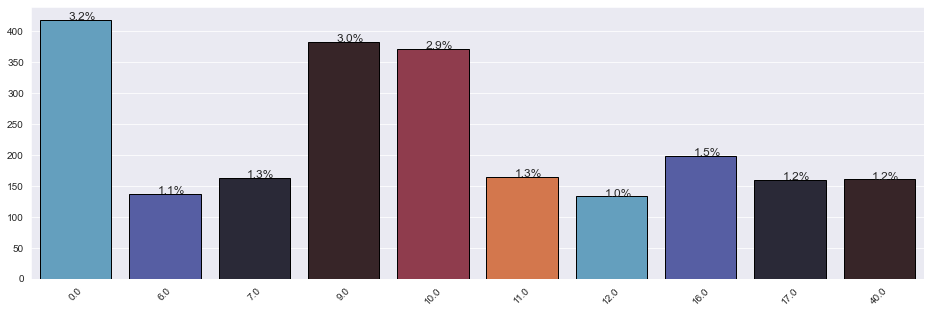

In \[10\]:

    per_on_bar(df.Prompt)

    Total unique values are:  8 


    Category    Value

    5    1805
    2    1800
    6    1800
    1    1783
    4    1772
    3    1726
    7    1569
    8     723
    Name: Prompt, dtype: int64

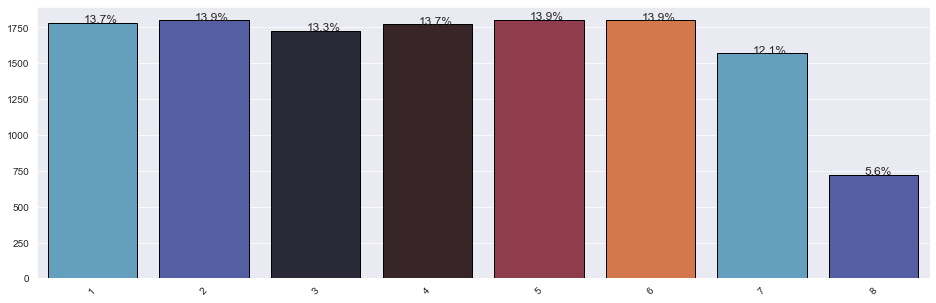

# Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>

In \[11\]:

    df.drop_duplicates(inplace=True)

In \[12\]:

    df.isnull().sum()

Out\[12\]:

    essay               0
    Manual_Score        1
    Unnamed: 3      12976
    Prompt              0
    dtype: int64

In \[13\]:

    df.dropna(subset=["Manual_Score"], inplace=True)

In \[14\]:

    # Dropping unecassary feature
    df.drop("Unnamed: 3", axis=1, inplace=True)

In \[15\]:

    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    def clean_data(txt):
        txt = re.sub('[^a-zA-Z]', ' ', txt)
        txt = txt.lower()
        txt = txt.split()
        txt = [lemmatizer.lemmatize(word) for word in txt if not word in STOPWORDS]
        txt = ' '.join(txt)
        return txt

In \[16\]:

    df.head()

Out\[16\]:

|          | essay                                             | Manual_Score | Prompt |
|----------|---------------------------------------------------|--------------|--------|
| essay_id |                                                   |              |        |
| 1        | Dear local newspaper, I think effects computer... | 8.0          | 1      |
| 2        | Dear @CAPS1 @CAPS2, I believe that using compu... | 9.0          | 1      |
| 3        | Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl... | 7.0          | 1      |
| 4        | Dear Local Newspaper, @CAPS1 I have found that... | 10.0         | 1      |
| 5        | Dear @LOCATION1, I know having computers has a... | 8.0          | 1      |

In \[17\]:

    df["clean_text"] = df.essay.apply(clean_data)

In \[18\]:

    df.head()

Out\[18\]:

|          | essay                                             | Manual_Score | Prompt | clean_text                                        |
|----------|---------------------------------------------------|--------------|--------|---------------------------------------------------|
| essay_id |                                                   |              |        |                                                   |
| 1        | Dear local newspaper, I think effects computer... | 8.0          | 1      | dear local newspaper think effect computer peo... |
| 2        | Dear @CAPS1 @CAPS2, I believe that using compu... | 9.0          | 1      | dear cap cap believe using computer benefit u ... |
| 3        | Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl... | 7.0          | 1      | dear cap cap cap people use computer everyone ... |
| 4        | Dear Local Newspaper, @CAPS1 I have found that... | 10.0         | 1      | dear local newspaper cap found many expert say... |
| 5        | Dear @LOCATION1, I know having computers has a... | 8.0          | 1      | dear location know computer positive effect pe... |

# Sentiment Analysis<a href="#Sentiment-Analysis" class="anchor-link">¶</a>

In \[19\]:

    # Function to calculate polarity
    def get_polarity(text):
        return TextBlob(text).sentiment.polarity

In \[20\]:

    # Caluculating Polarity and Polarity of tweets
    df["polarity"] = df["clean_text"].apply(get_polarity)

In \[21\]:

    # Function to generating Sentiments
    def get_sentiment(x):
        if x==0.0:
            return "Neutral"
        elif x<0:
            return "Negative"
        else:
            return "Positive"

In \[22\]:

    # Generating Sentiments
    df["sentiment"] = df["polarity"].apply(get_sentiment)
    df.head()

Out\[22\]:

|          | essay                                             | Manual_Score | Prompt | clean_text                                        | polarity | sentiment |
|----------|---------------------------------------------------|--------------|--------|---------------------------------------------------|----------|-----------|
| essay_id |                                                   |              |        |                                                   |          |           |
| 1        | Dear local newspaper, I think effects computer... | 8.0          | 1      | dear local newspaper think effect computer peo... | 0.262843 | Positive  |
| 2        | Dear @CAPS1 @CAPS2, I believe that using compu... | 9.0          | 1      | dear cap cap believe using computer benefit u ... | 0.327451 | Positive  |
| 3        | Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl... | 7.0          | 1      | dear cap cap cap people use computer everyone ... | 0.277273 | Positive  |
| 4        | Dear Local Newspaper, @CAPS1 I have found that... | 10.0         | 1      | dear local newspaper cap found many expert say... | 0.223481 | Positive  |
| 5        | Dear @LOCATION1, I know having computers has a... | 8.0          | 1      | dear location know computer positive effect pe... | 0.143769 | Positive  |

In \[23\]:

    per_on_bar(df.sentiment)

    Total unique values are:  3 


    Category    Value

    Positive    10289
    Negative     2289
    Neutral       397
    Name: sentiment, dtype: int64

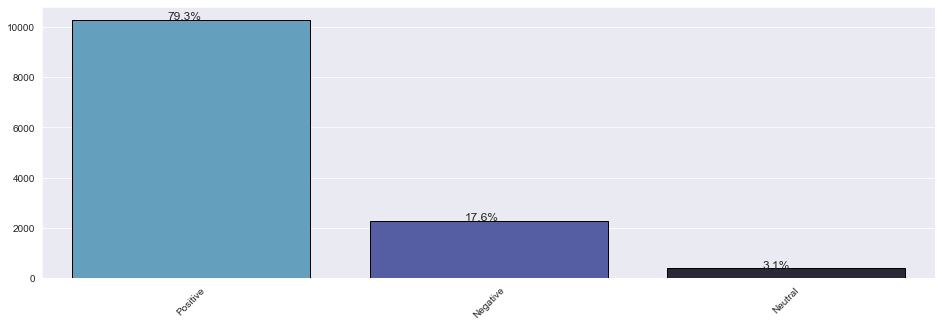

# Without POS<a href="#Without-POS" class="anchor-link">¶</a>

In \[24\]:

    # Arrays to store performance
    train_score = []
    test_score  = []
    rmse_score  = []
    mae_score   = []
    rsqaure_score = []
    models_name = []
    vect_techn  = []
    pos = []

    # Multiple regressors
    models = []
    models.append(('Ridge', Ridge()))
    models.append(('LinearRegression', LinearRegression()))
    models.append(('Decision Tree', DecisionTreeRegressor()))
    models.append(('Random Forest', RandomForestRegressor()))
    models.append(('KNeighborsRegressor', KNeighborsRegressor()))

In \[25\]:

    vectorizers = [CountVectorizer(ngram_range=(1,1), max_features=1000, stop_words='english'),
                    TfidfVectorizer(max_features=1000, stop_words='english')]

    for vectorizer in vectorizers:
        X = vectorizer.fit_transform(df.clean_text).toarray()
        y = df.Manual_Score.values
        
        stk = StratifiedKFold(n_splits=5)
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2)
        
        i = 0
        for name, model in models:
            i = i+1
            start_time = time.time()

            train_l = []
            test_l  = []
            mae_l   = []
            rmse_l  = []
            r2_l    = []

            for train_index, test_index in stk.split(X, y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                # Fitting model to the Training set
                model.fit(X_train, y_train)

                # Scores of model
                train = model.score(X_train, y_train)
                test = model.score(X_test, y_test)

                train_l.append(train)
                test_l.append(test)

                # predict values
                predictions = model.predict(X_test)
                # RMSE
                rmse = np.sqrt(mean_squared_error(y_test, predictions))
                rmse_l.append(rmse)
                # MAE
                mae = mean_absolute_error(y_test,predictions)
                mae_l.append(mae)
                # R2 score
                r2 = r2_score(y_test,predictions)
                r2_l.append(r2)

            train_score.append(np.mean(train_l))
            test_score.append(np.mean(test_l))
            rmse_score.append(np.mean(rmse_l))
            mae_score.append(np.mean(mae_l))
            rsqaure_score.append(np.mean(r2_l))
            models_name.append(name)
            pos.append(False)
            vect_techn.append(type(vectorizer).__name__)

            print("+","="*100,"+")
            print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
            print("+","="*100,"+")
            print("POS = NO")
            print("-"*50)
            print(f"Vectorization = {type(vectorizer).__name__}")
            print("-"*50)
            print('Root mean squared error (RMSE) : ', np.mean(rmse_l))   
            print("-"*50)
            print('Mean absolute error (MAE) : ', np.mean(mae_l))
            print("-"*50)
            print('R2 score : ', np.mean(r2_l))
            print("-"*50)


            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_ts)
            plt.figure(figsize=(14, 6))
            sns.lineplot(x=range(len(y_ts[:100])), y=y_ts[:100], label="Original Grade")
            sns.lineplot(x=range(len(y_ts[:100])), y=y_pred[:100], label="Predicted Grade")
            plt.title(f"Acutal VS Predicted Grade ({type(model).__name__})")
            plt.xlabel("Index")
            plt.ylabel("Grading Score")
            plt.legend()
            plt.show()


            print("\t\t\t\t\t\t\t-----------------------------------------------------------")
            print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
            print("\t\t\t\t\t\t\t-----------------------------------------------------------")
            print()

    + ==================================================================================================== +
                1-For Ridge The Performance result is: 
    + ==================================================================================================== +
    POS = NO
    --------------------------------------------------
    Vectorization = CountVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  3.7968244954679875
    --------------------------------------------------
    Mean absolute error (MAE) :  2.5090602082892706
    --------------------------------------------------
    R2 score :  0.8207121422572327
    --------------------------------------------------

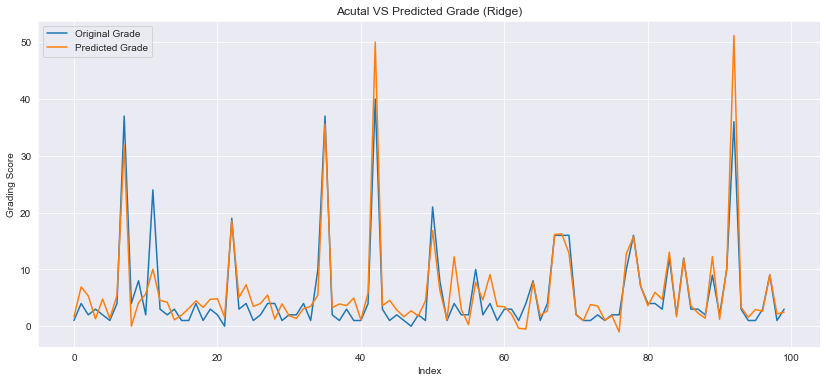

                               -----------------------------------------------------------
                                 Time for detection (Ridge) : 3.133 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                2-For LinearRegression The Performance result is: 
    + ==================================================================================================== +
    POS = NO
    --------------------------------------------------
    Vectorization = CountVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  3.800644897474804
    --------------------------------------------------
    Mean absolute error (MAE) :  2.5128719492355875
    --------------------------------------------------
    R2 score :  0.820352079134064
    --------------------------------------------------

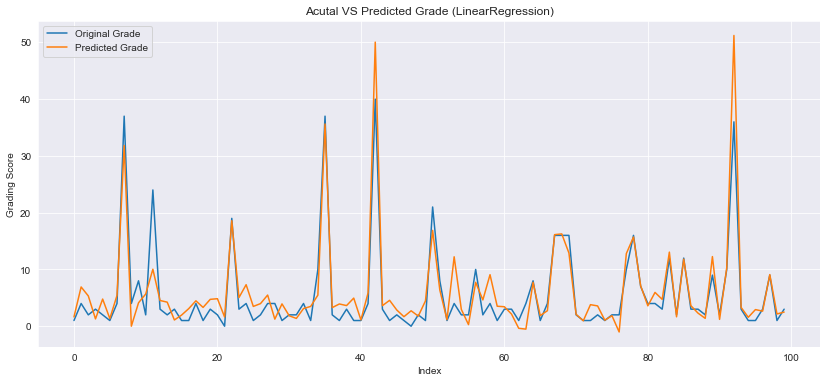

                               -----------------------------------------------------------
                                 Time for detection (LinearRegression) : 12.588 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                3-For Decision Tree The Performance result is: 
    + ==================================================================================================== +
    POS = NO
    --------------------------------------------------
    Vectorization = CountVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  3.5436786069761768
    --------------------------------------------------
    Mean absolute error (MAE) :  1.7082851637764933
    --------------------------------------------------
    R2 score :  0.8426633655868268
    --------------------------------------------------

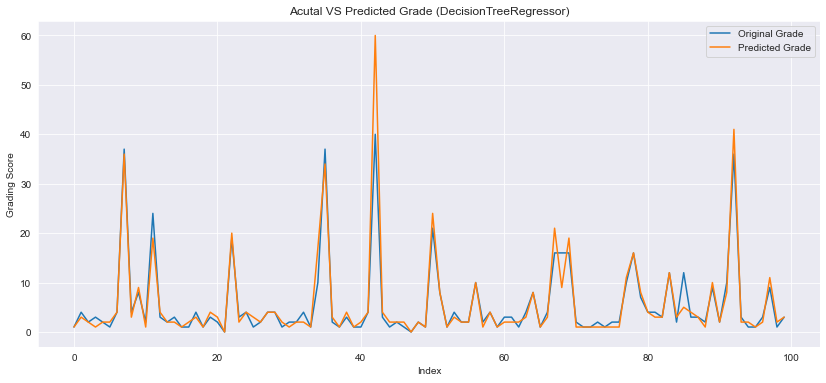

                               -----------------------------------------------------------
                                 Time for detection (Decision Tree) : 22.46 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                4-For Random Forest The Performance result is: 
    + ==================================================================================================== +
    POS = NO
    --------------------------------------------------
    Vectorization = CountVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  2.63280807113996
    --------------------------------------------------
    Mean absolute error (MAE) :  1.3427441233140656
    --------------------------------------------------
    R2 score :  0.9135214235833568
    --------------------------------------------------

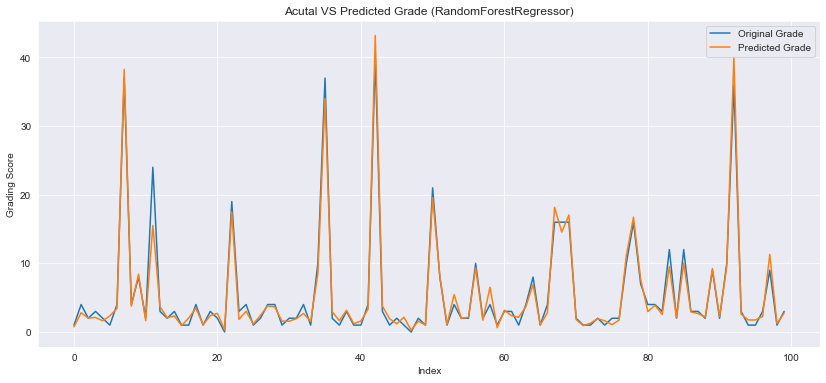

                               -----------------------------------------------------------
                                 Time for detection (Random Forest) : 1252.777 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                5-For KNeighborsRegressor The Performance result is: 
    + ==================================================================================================== +
    POS = NO
    --------------------------------------------------
    Vectorization = CountVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  4.568745737296293
    --------------------------------------------------
    Mean absolute error (MAE) :  2.2455337186897877
    --------------------------------------------------
    R2 score :  0.7400550669162809
    --------------------------------------------------

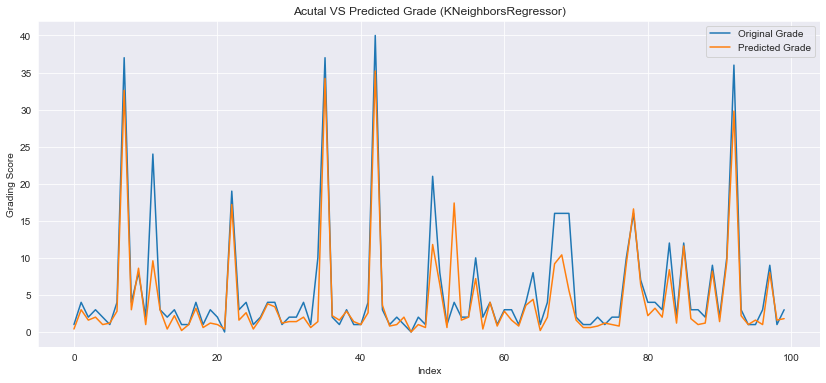

                               -----------------------------------------------------------
                                 Time for detection (KNeighborsRegressor) : 41.36 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                1-For Ridge The Performance result is: 
    + ==================================================================================================== +
    POS = NO
    --------------------------------------------------
    Vectorization = TfidfVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  3.18348099859315
    --------------------------------------------------
    Mean absolute error (MAE) :  2.170084672849215
    --------------------------------------------------
    R2 score :  0.8738538909581305
    --------------------------------------------------

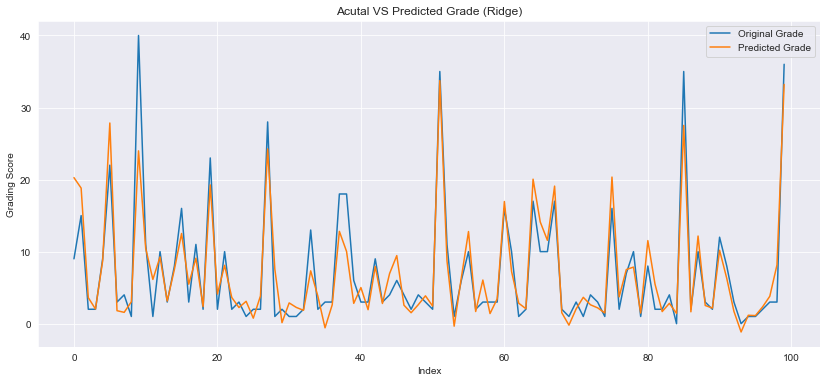

                               -----------------------------------------------------------
                                 Time for detection (Ridge) : 2.79 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                2-For LinearRegression The Performance result is: 
    + ==================================================================================================== +
    POS = NO
    --------------------------------------------------
    Vectorization = TfidfVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  3.2722449038169494
    --------------------------------------------------
    Mean absolute error (MAE) :  2.26494255632037
    --------------------------------------------------
    R2 score :  0.8665971113266483
    --------------------------------------------------

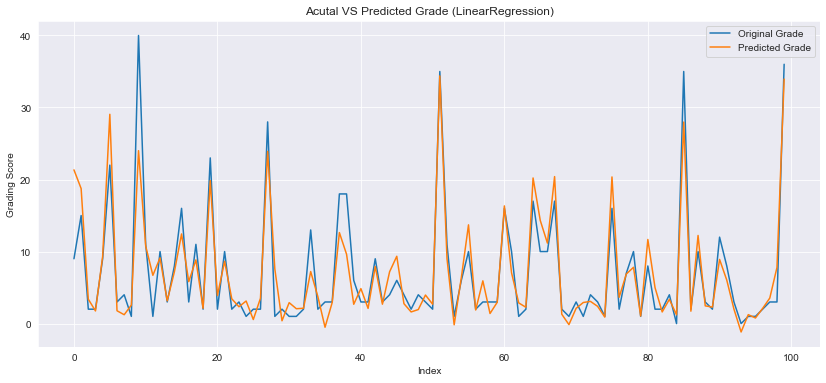

                               -----------------------------------------------------------
                                 Time for detection (LinearRegression) : 12.95 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                3-For Decision Tree The Performance result is: 
    + ==================================================================================================== +
    POS = NO
    --------------------------------------------------
    Vectorization = TfidfVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  3.815767194853047
    --------------------------------------------------
    Mean absolute error (MAE) :  1.7797687861271676
    --------------------------------------------------
    R2 score :  0.818607614782026
    --------------------------------------------------

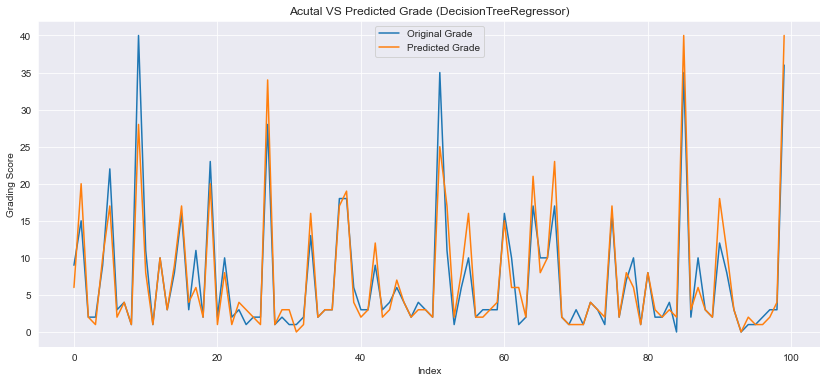

                               -----------------------------------------------------------
                                 Time for detection (Decision Tree) : 24.841 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                4-For Random Forest The Performance result is: 
    + ==================================================================================================== +
    POS = NO
    --------------------------------------------------
    Vectorization = TfidfVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  2.7404245903310964
    --------------------------------------------------
    Mean absolute error (MAE) :  1.3825758895311495
    --------------------------------------------------
    R2 score :  0.906354140155611
    --------------------------------------------------

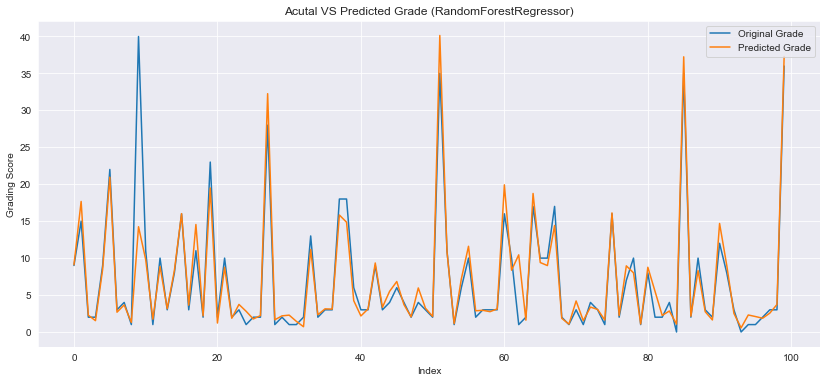

                               -----------------------------------------------------------
                                 Time for detection (Random Forest) : 1428.85 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                5-For KNeighborsRegressor The Performance result is: 
    + ==================================================================================================== +
    POS = NO
    --------------------------------------------------
    Vectorization = TfidfVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  3.3077957434949967
    --------------------------------------------------
    Mean absolute error (MAE) :  1.688724470134875
    --------------------------------------------------
    R2 score :  0.8610535615340267
    --------------------------------------------------

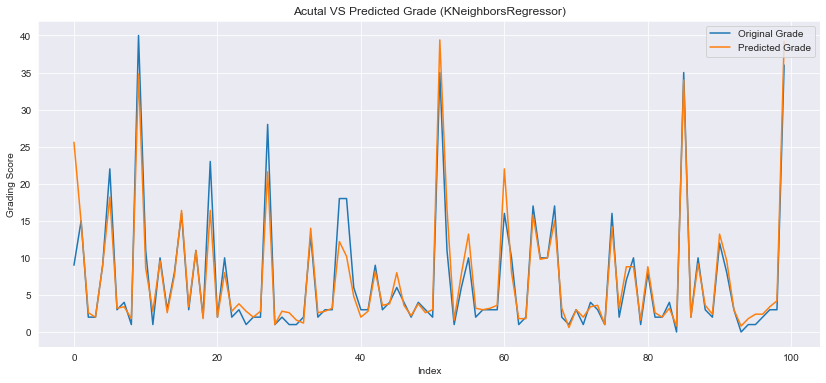

                               -----------------------------------------------------------
                                 Time for detection (KNeighborsRegressor) : 38.51 seconds...
                                -----------------------------------------------------------

In \[26\]:

    comp = pd.DataFrame({"Model": models_name, "POS": pos, "Vectorization Method": vect_techn, "Training Score": train_score, "Testing Score": test_score, "R2 Score":rsqaure_score, "RMSE": rmse_score, "MAE": mae_score})
    comp

Out\[26\]:

|     | Model               | POS   | Vectorization Method | Training Score | Testing Score | R2 Score | RMSE     | MAE      |
|-----|---------------------|-------|----------------------|----------------|---------------|----------|----------|----------|
| 0   | Ridge               | False | CountVectorizer      | 0.882551       | 0.820712      | 0.820712 | 3.796824 | 2.509060 |
| 1   | LinearRegression    | False | CountVectorizer      | 0.882552       | 0.820352      | 0.820352 | 3.800645 | 2.512872 |
| 2   | Decision Tree       | False | CountVectorizer      | 0.999998       | 0.842663      | 0.842663 | 3.543679 | 1.708285 |
| 3   | Random Forest       | False | CountVectorizer      | 0.989918       | 0.913521      | 0.913521 | 2.632808 | 1.342744 |
| 4   | KNeighborsRegressor | False | CountVectorizer      | 0.840851       | 0.740055      | 0.740055 | 4.568746 | 2.245534 |
| 5   | Ridge               | False | TfidfVectorizer      | 0.902393       | 0.873854      | 0.873854 | 3.183481 | 2.170085 |
| 6   | LinearRegression    | False | TfidfVectorizer      | 0.904072       | 0.866597      | 0.866597 | 3.272245 | 2.264943 |
| 7   | Decision Tree       | False | TfidfVectorizer      | 0.999998       | 0.818608      | 0.818608 | 3.815767 | 1.779769 |
| 8   | Random Forest       | False | TfidfVectorizer      | 0.988884       | 0.906354      | 0.906354 | 2.740425 | 1.382576 |
| 9   | KNeighborsRegressor | False | TfidfVectorizer      | 0.919281       | 0.861054      | 0.861054 | 3.307796 | 1.688724 |

In \[27\]:

    from docx import Document

    def df_to_word(data: dict, report_name:str):
        assert type(data) == dict, 'data has to be dict'
        assert '.docx' in report_name, 'report_name has to be a .docx file'
        df = pd.DataFrame(data)
        doc = Document()

        table = doc.add_table(df.shape[0]+1, df.shape[1])

        for j in range(df.shape[-1]):
            table.cell(0,j).text = df.columns[j]

        for i in range(df.shape[0]):
            for j in range(df.shape[-1]):
                table.cell(i+1,j).text = str(df.values[i,j])

        doc.save(f'./{report_name}')

    df_to_word(comp.to_dict(), "performance_without_POS.docx")

# With POS<a href="#With-POS" class="anchor-link">¶</a>

In \[28\]:

    # Genrating POS
    def get_pos(row):
        row = nltk.tokenize.word_tokenize(row)
        pos = nltk.pos_tag(row)
        return pos

    df["POS"] = df.clean_text.apply(get_pos)

    df.head()

Out\[28\]:

|          | essay                                             | Manual_Score | Prompt | clean_text                                        | polarity | sentiment | POS                                                |
|----------|---------------------------------------------------|--------------|--------|---------------------------------------------------|----------|-----------|----------------------------------------------------|
| essay_id |                                                   |              |        |                                                   |          |           |                                                    |
| 1        | Dear local newspaper, I think effects computer... | 8.0          | 1      | dear local newspaper think effect computer peo... | 0.262843 | Positive  | \[(dear, JJ), (local, JJ), (newspaper, NN), (th... |
| 2        | Dear @CAPS1 @CAPS2, I believe that using compu... | 9.0          | 1      | dear cap cap believe using computer benefit u ... | 0.327451 | Positive  | \[(dear, JJ), (cap, NN), (cap, NN), (believe, V... |
| 3        | Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl... | 7.0          | 1      | dear cap cap cap people use computer everyone ... | 0.277273 | Positive  | \[(dear, JJ), (cap, NN), (cap, NN), (cap, NN), ... |
| 4        | Dear Local Newspaper, @CAPS1 I have found that... | 10.0         | 1      | dear local newspaper cap found many expert say... | 0.223481 | Positive  | \[(dear, JJ), (local, JJ), (newspaper, NN), (ca... |
| 5        | Dear @LOCATION1, I know having computers has a... | 8.0          | 1      | dear location know computer positive effect pe... | 0.143769 | Positive  | \[(dear, JJ), (location, NN), (know, VBP), (com... |

In \[29\]:

    # Counting POS
    def count_post(row, name="NN"):
        return list(dict(row).values()).count(name)

    df["count_noun"] = [count_post(i, name="NN") for i in df.POS]
    df["count_pronoun"] = [count_post(i, name="WP") for i in df.POS]
    df["count_verb"] = [count_post(i, name="VB") for i in df.POS]
    df["count_adverb"] = [count_post(i, name="RB") for i in df.POS]
    df["count_adjective"] = [count_post(i, name="JJ") for i in df.POS]

In \[30\]:

    # COmbining word and part of speach
    def combine_POS(pos):
        text = ""
        for i in pos:
            temp = str(i[0])+"_"+str(i[1])
            text = text + " " + temp
        return str(text)

    df["clean_text"] = df["POS"].apply(combine_POS)
    df.head(7)

Out\[30\]:

|          | essay                                             | Manual_Score | Prompt | clean_text                                       | polarity | sentiment | POS                                                | count_noun | count_pronoun | count_verb | count_adverb | count_adjective |
|----------|---------------------------------------------------|--------------|--------|--------------------------------------------------|----------|-----------|----------------------------------------------------|------------|---------------|------------|--------------|-----------------|
| essay_id |                                                   |              |        |                                                  |          |           |                                                    |            |               |            |              |                 |
| 1        | Dear local newspaper, I think effects computer... | 8.0          | 1      | dear_JJ local_JJ newspaper_NN think_VBP effec... | 0.262843 | Positive  | \[(dear, JJ), (local, JJ), (newspaper, NN), (th... | 46         | 1             | 6          | 8            | 18              |
| 2        | Dear @CAPS1 @CAPS2, I believe that using compu... | 9.0          | 1      | dear_JJ cap_NN cap_NN believe_VBP using_VBG c... | 0.327451 | Positive  | \[(dear, JJ), (cap, NN), (cap, NN), (believe, V... | 54         | 0             | 10         | 7            | 14              |
| 3        | Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl... | 7.0          | 1      | dear_JJ cap_NN cap_NN cap_NN people_NNS use_V... | 0.277273 | Positive  | \[(dear, JJ), (cap, NN), (cap, NN), (cap, NN), ... | 41         | 0             | 4          | 2            | 16              |
| 4        | Dear Local Newspaper, @CAPS1 I have found that... | 10.0         | 1      | dear_JJ local_JJ newspaper_NN cap_NN found_VB... | 0.223481 | Positive  | \[(dear, JJ), (local, JJ), (newspaper, NN), (ca... | 72         | 0             | 9          | 10           | 30              |
| 5        | Dear @LOCATION1, I know having computers has a... | 8.0          | 1      | dear_JJ location_NN know_VBP computer_NN posi... | 0.143769 | Positive  | \[(dear, JJ), (location, NN), (know, VBP), (com... | 55         | 0             | 11         | 10           | 21              |
| 6        | Dear @LOCATION1, I think that computers have a... | 8.0          | 1      | dear_JJ location_NN think_VBP computer_NN neg... | 0.166964 | Positive  | \[(dear, JJ), (location, NN), (think, VBP), (co... | 30         | 0             | 3          | 6            | 17              |
| 7        | Did you know that more and more people these d... | 10.0         | 1      | know_JJ people_NNS day_NN depending_VBG compu... | 0.087944 | Positive  | \[(know, JJ), (people, NNS), (day, NN), (depend... | 58         | 1             | 9          | 21           | 26              |

In \[31\]:

    cols = ["Manual_Score", "Prompt", "count_noun", "count_verb", "count_adverb", "count_adjective", "count_pronoun"]
    corr_spears = df[cols].corr(method="spearman")
    corr_spears

Out\[31\]:

|                 | Manual_Score | Prompt    | count_noun | count_verb | count_adverb | count_adjective | count_pronoun |
|-----------------|--------------|-----------|------------|------------|--------------|-----------------|---------------|
| Manual_Score    | 1.000000     | 0.169725  | 0.635916   | 0.470026   | 0.612442     | 0.610089        | 0.146206      |
| Prompt          | 0.169725     | 1.000000  | -0.227543  | -0.204883  | -0.127711    | -0.192161       | -0.150167     |
| count_noun      | 0.635916     | -0.227543 | 1.000000   | 0.664406   | 0.768514     | 0.882897        | 0.168374      |
| count_verb      | 0.470026     | -0.204883 | 0.664406   | 1.000000   | 0.601168     | 0.656539        | 0.127985      |
| count_adverb    | 0.612442     | -0.127711 | 0.768514   | 0.601168   | 1.000000     | 0.775066        | 0.145936      |
| count_adjective | 0.610089     | -0.192161 | 0.882897   | 0.656539   | 0.775066     | 1.000000        | 0.151214      |
| count_pronoun   | 0.146206     | -0.150167 | 0.168374   | 0.127985   | 0.145936     | 0.151214        | 1.000000      |

In \[32\]:

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_spears, annot=True)
    plt.show()

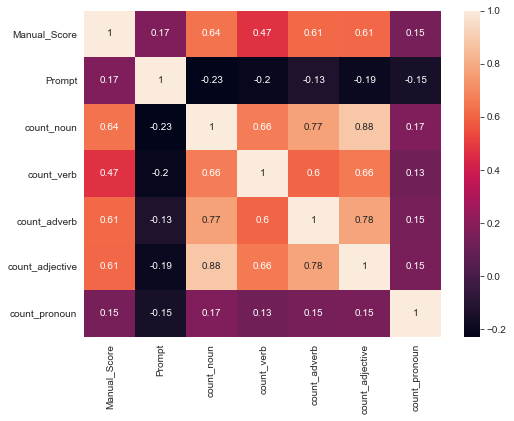

In \[33\]:

    data = df.copy()

In \[34\]:

    vectorizers = [CountVectorizer(ngram_range=(1,1), max_features=1000, stop_words='english'),
                    TfidfVectorizer(max_features=1000, stop_words='english')]

    for vectorizer in vectorizers:
        vecs = vectorizer.fit_transform(df.clean_text).toarray()
        
        # Create dataframe
        df_vec = pd.DataFrame(vecs, columns=vectorizer.get_feature_names())
        cols = ["Prompt", "Manual_Score", "count_noun", "count_verb", "count_adverb", "count_adjective", "count_pronoun"]
        df_vec[cols] = df[cols]
        df_vec.dropna(axis=0, inplace=True)
        df_vec.reset_index(inplace=True, drop=True)

        # Separating input and output feature
        X = df_vec.drop("Manual_Score", axis=1).values
        y = df_vec.Manual_Score.values
        
        stk = StratifiedKFold(n_splits=5)
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2)
        
        i = 0
        for name, model in models:
            i = i+1
            start_time = time.time()

            train_l = []
            test_l  = []
            mae_l   = []
            rmse_l  = []
            r2_l    = []

            for train_index, test_index in stk.split(X, y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                # Fitting model to the Training set
                model.fit(X_train, y_train)

                # Scores of model
                train = model.score(X_train, y_train)
                test = model.score(X_test, y_test)

                train_l.append(train)
                test_l.append(test)

                # predict values
                predictions = model.predict(X_test)
                # RMSE
                rmse = np.sqrt(mean_squared_error(y_test, predictions))
                rmse_l.append(rmse)
                # MAE
                mae = mean_absolute_error(y_test,predictions)
                mae_l.append(mae)
                # R2 score
                r2 = r2_score(y_test,predictions)
                r2_l.append(r2)

            train_score.append(np.mean(train_l))
            test_score.append(np.mean(test_l))
            rmse_score.append(np.mean(rmse_l))
            mae_score.append(np.mean(mae_l))
            rsqaure_score.append(np.mean(r2_l))
            models_name.append(name)
            pos.append(True)
            vect_techn.append(type(vectorizer).__name__)

            print("+","="*100,"+")
            print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
            print("+","="*100,"+")
            print("POS = YES")
            print("-"*50)
            print(f"Vectorization = {type(vectorizer).__name__}")
            print("-"*50)
            print('Root mean squared error (RMSE) : ', np.mean(rmse_l))   
            print("-"*50)
            print('Mean absolute error (MAE) : ', np.mean(mae_l))
            print("-"*50)
            print('R2 score : ', np.mean(r2_l))
            print("-"*50)


            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_ts)
            plt.figure(figsize=(14, 6))
            sns.lineplot(x=range(len(y_ts[:100])), y=y_ts[:100], label="Original Grade")
            sns.lineplot(x=range(len(y_ts[:100])), y=y_pred[:100], label="Predicted Grade")
            plt.title(f"Acutal VS Predicted Grade ({type(model).__name__})")
            plt.xlabel("Index")
            plt.ylabel("Grading Score")
            plt.legend()
            plt.show()


            print("\t\t\t\t\t\t\t-----------------------------------------------------------")
            print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
            print("\t\t\t\t\t\t\t-----------------------------------------------------------")
            print()

    + ==================================================================================================== +
                1-For Ridge The Performance result is: 
    + ==================================================================================================== +
    POS = YES
    --------------------------------------------------
    Vectorization = CountVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  3.341694724791098
    --------------------------------------------------
    Mean absolute error (MAE) :  2.439918233819685
    --------------------------------------------------
    R2 score :  0.8578074356858977
    --------------------------------------------------

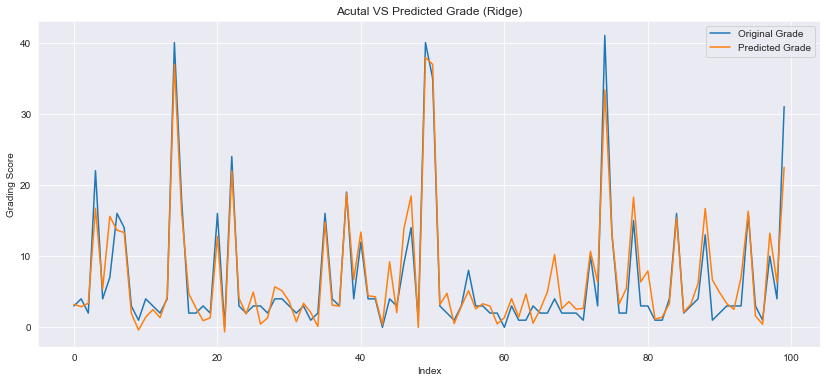

                               -----------------------------------------------------------
                                 Time for detection (Ridge) : 3.006 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                2-For LinearRegression The Performance result is: 
    + ==================================================================================================== +
    POS = YES
    --------------------------------------------------
    Vectorization = CountVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  3.344581178180932
    --------------------------------------------------
    Mean absolute error (MAE) :  2.4425760051880427
    --------------------------------------------------
    R2 score :  0.8575439568069954
    --------------------------------------------------

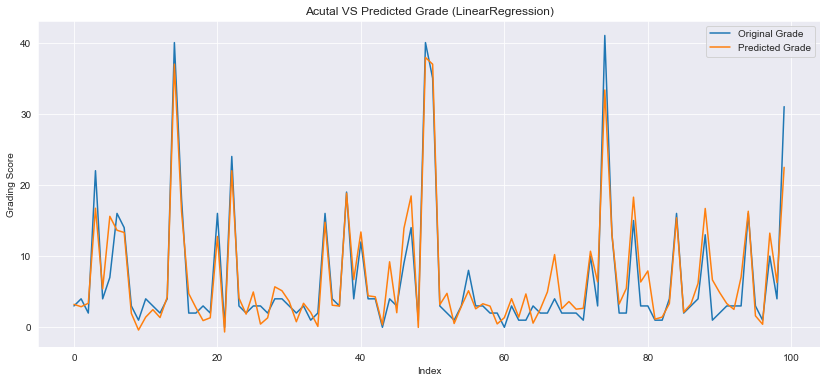

                               -----------------------------------------------------------
                                 Time for detection (LinearRegression) : 13.309 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                3-For Decision Tree The Performance result is: 
    + ==================================================================================================== +
    POS = YES
    --------------------------------------------------
    Vectorization = CountVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  2.361619243056013
    --------------------------------------------------
    Mean absolute error (MAE) :  1.3110862922142843
    --------------------------------------------------
    R2 score :  0.928922878789713
    --------------------------------------------------

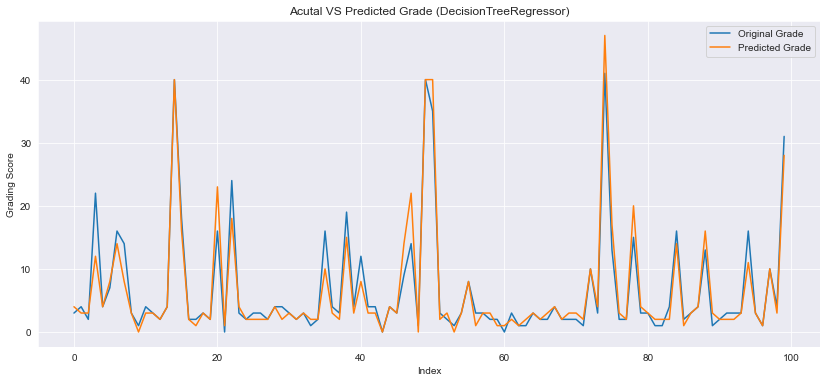

                               -----------------------------------------------------------
                                 Time for detection (Decision Tree) : 11.803 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                4-For Random Forest The Performance result is: 
    + ==================================================================================================== +
    POS = YES
    --------------------------------------------------
    Vectorization = CountVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  1.7611704446779197
    --------------------------------------------------
    Mean absolute error (MAE) :  1.0370468809747706
    --------------------------------------------------
    R2 score :  0.9588588802043809
    --------------------------------------------------

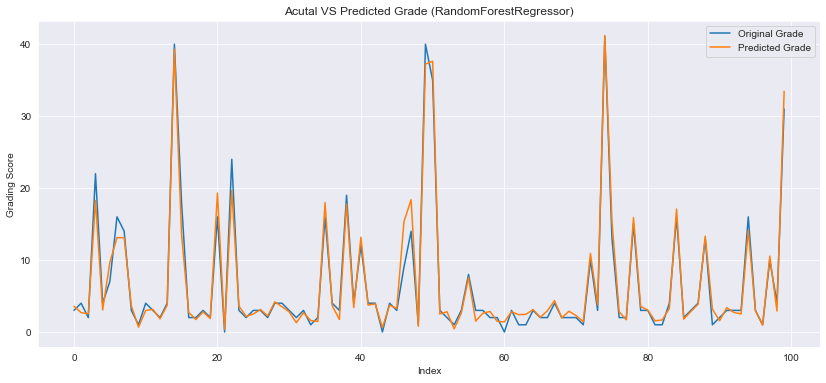

                               -----------------------------------------------------------
                                 Time for detection (Random Forest) : 629.746 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                5-For KNeighborsRegressor The Performance result is: 
    + ==================================================================================================== +
    POS = YES
    --------------------------------------------------
    Vectorization = CountVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  3.600161240775841
    --------------------------------------------------
    Mean absolute error (MAE) :  1.7891924955024414
    --------------------------------------------------
    R2 score :  0.8382468044310076
    --------------------------------------------------

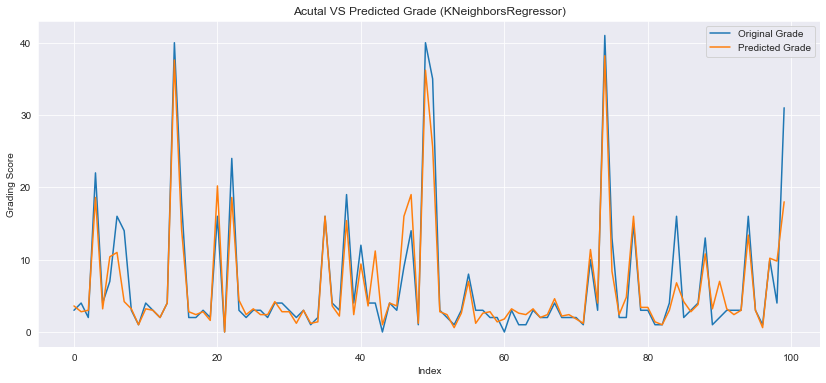

                               -----------------------------------------------------------
                                 Time for detection (KNeighborsRegressor) : 35.228 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                1-For Ridge The Performance result is: 
    + ==================================================================================================== +
    POS = YES
    --------------------------------------------------
    Vectorization = TfidfVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  2.763165432671256
    --------------------------------------------------
    Mean absolute error (MAE) :  1.9573646616813445
    --------------------------------------------------
    R2 score :  0.9017120275749051
    --------------------------------------------------

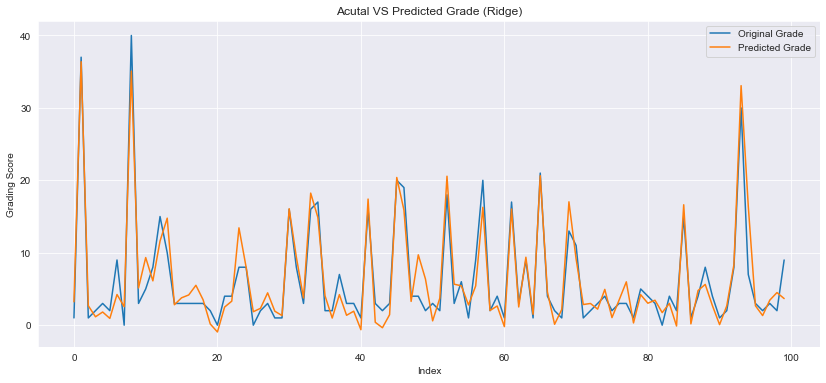

                               -----------------------------------------------------------
                                 Time for detection (Ridge) : 3.037 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                2-For LinearRegression The Performance result is: 
    + ==================================================================================================== +
    POS = YES
    --------------------------------------------------
    Vectorization = TfidfVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  2.826810650550482
    --------------------------------------------------
    Mean absolute error (MAE) :  2.022006156287067
    --------------------------------------------------
    R2 score :  0.8970921481073637
    --------------------------------------------------

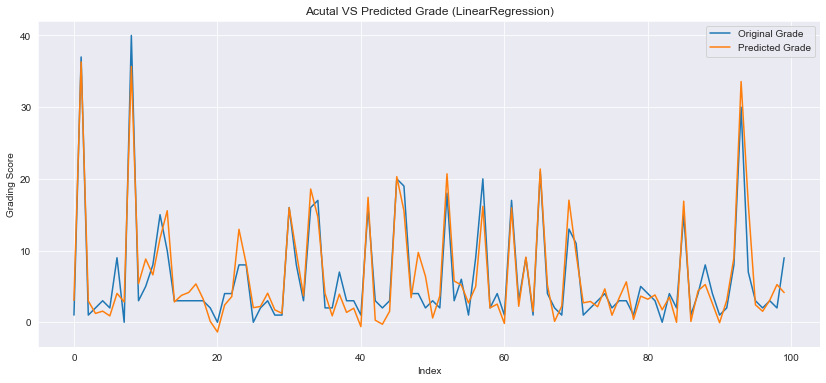

                               -----------------------------------------------------------
                                 Time for detection (LinearRegression) : 13.236 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                3-For Decision Tree The Performance result is: 
    + ==================================================================================================== +
    POS = YES
    --------------------------------------------------
    Vectorization = TfidfVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  2.4285070889230402
    --------------------------------------------------
    Mean absolute error (MAE) :  1.3208763368259047
    --------------------------------------------------
    R2 score :  0.9248964425753105
    --------------------------------------------------

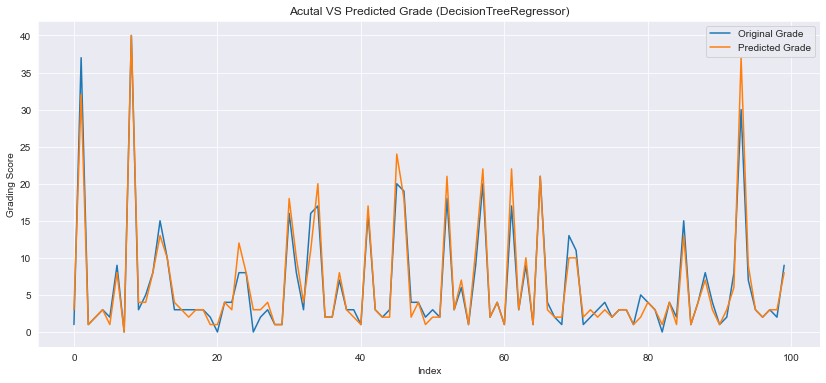

                               -----------------------------------------------------------
                                 Time for detection (Decision Tree) : 14.312 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                4-For Random Forest The Performance result is: 
    + ==================================================================================================== +
    POS = YES
    --------------------------------------------------
    Vectorization = TfidfVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  1.7712451435106835
    --------------------------------------------------
    Mean absolute error (MAE) :  1.043063218662305
    --------------------------------------------------
    R2 score :  0.9582131447758636
    --------------------------------------------------

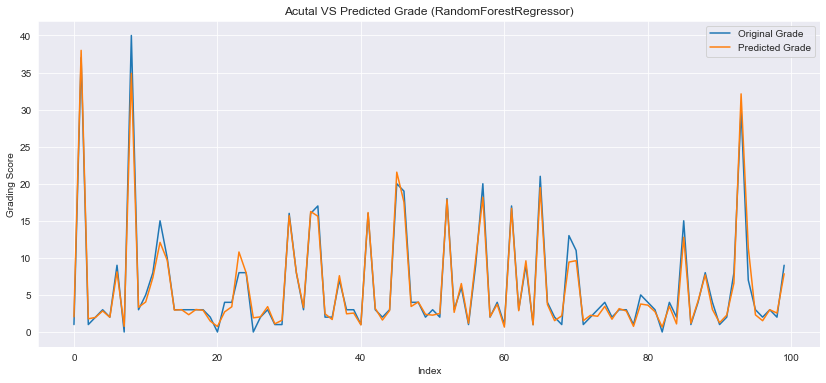

                               -----------------------------------------------------------
                                 Time for detection (Random Forest) : 779.348 seconds...
                                -----------------------------------------------------------

    + ==================================================================================================== +
                5-For KNeighborsRegressor The Performance result is: 
    + ==================================================================================================== +
    POS = YES
    --------------------------------------------------
    Vectorization = TfidfVectorizer
    --------------------------------------------------
    Root mean squared error (RMSE) :  4.26597525501847
    --------------------------------------------------
    Mean absolute error (MAE) :  2.546843306697091
    --------------------------------------------------
    R2 score :  0.7623035531489897
    --------------------------------------------------

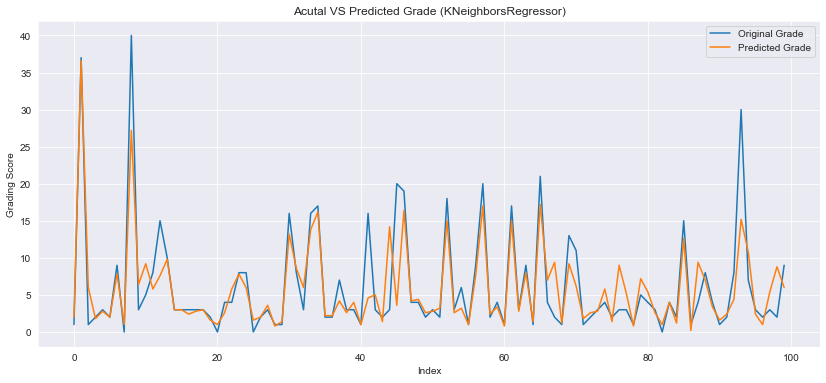

                               -----------------------------------------------------------
                                 Time for detection (KNeighborsRegressor) : 39.004 seconds...
                                -----------------------------------------------------------

In \[37\]:

    comp = pd.DataFrame({"Model": models_name, "POS": pos, "Vectorization Method": vect_techn, "Training Score": train_score, "Testing Score": test_score, "R2 Score":rsqaure_score, "RMSE": rmse_score, "MAE": mae_score})
    df_to_word(comp.to_dict(), "performance_with_POS.docx")
    comp

Out\[37\]:

|     | Model               | POS   | Vectorization Method | Training Score | Testing Score | R2 Score | RMSE     | MAE      |
|-----|---------------------|-------|----------------------|----------------|---------------|----------|----------|----------|
| 0   | Ridge               | False | CountVectorizer      | 0.882551       | 0.820712      | 0.820712 | 3.796824 | 2.509060 |
| 1   | LinearRegression    | False | CountVectorizer      | 0.882552       | 0.820352      | 0.820352 | 3.800645 | 2.512872 |
| 2   | Decision Tree       | False | CountVectorizer      | 0.999998       | 0.842663      | 0.842663 | 3.543679 | 1.708285 |
| 3   | Random Forest       | False | CountVectorizer      | 0.989918       | 0.913521      | 0.913521 | 2.632808 | 1.342744 |
| 4   | KNeighborsRegressor | False | CountVectorizer      | 0.840851       | 0.740055      | 0.740055 | 4.568746 | 2.245534 |
| 5   | Ridge               | False | TfidfVectorizer      | 0.902393       | 0.873854      | 0.873854 | 3.183481 | 2.170085 |
| 6   | LinearRegression    | False | TfidfVectorizer      | 0.904072       | 0.866597      | 0.866597 | 3.272245 | 2.264943 |
| 7   | Decision Tree       | False | TfidfVectorizer      | 0.999998       | 0.818608      | 0.818608 | 3.815767 | 1.779769 |
| 8   | Random Forest       | False | TfidfVectorizer      | 0.988884       | 0.906354      | 0.906354 | 2.740425 | 1.382576 |
| 9   | KNeighborsRegressor | False | TfidfVectorizer      | 0.919281       | 0.861054      | 0.861054 | 3.307796 | 1.688724 |
| 10  | Ridge               | True  | CountVectorizer      | 0.905284       | 0.857807      | 0.857807 | 3.341695 | 2.439918 |
| 11  | LinearRegression    | True  | CountVectorizer      | 0.905284       | 0.857544      | 0.857544 | 3.344581 | 2.442576 |
| 12  | Decision Tree       | True  | CountVectorizer      | 1.000000       | 0.928923      | 0.928923 | 2.361619 | 1.311086 |
| 13  | Random Forest       | True  | CountVectorizer      | 0.995307       | 0.958859      | 0.958859 | 1.761170 | 1.037047 |
| 14  | KNeighborsRegressor | True  | CountVectorizer      | 0.901410       | 0.838247      | 0.838247 | 3.600161 | 1.789192 |
| 15  | Ridge               | True  | TfidfVectorizer      | 0.928178       | 0.901712      | 0.901712 | 2.763165 | 1.957365 |
| 16  | LinearRegression    | True  | TfidfVectorizer      | 0.929032       | 0.897092      | 0.897092 | 2.826811 | 2.022006 |
| 17  | Decision Tree       | True  | TfidfVectorizer      | 1.000000       | 0.924896      | 0.924896 | 2.428507 | 1.320876 |
| 18  | Random Forest       | True  | TfidfVectorizer      | 0.995239       | 0.958213      | 0.958213 | 1.771245 | 1.043063 |
| 19  | KNeighborsRegressor | True  | TfidfVectorizer      | 0.886417       | 0.762304      | 0.762304 | 4.265975 | 2.546843 |

# LSTM Model<a href="#LSTM-Model" class="anchor-link">¶</a>

In \[38\]:

    from keras.preprocessing.text import Tokenizer
    from keras_preprocessing.sequence import pad_sequences
    from keras.models import Sequential, Model
    from keras.layers import Embedding
    from keras.layers import Input
    from keras.layers import LSTM, Bidirectional
    from keras.layers import Flatten
    from keras.layers.core import Dense, Dropout,Activation
    from keras.regularizers import l2
    from keras.optimizers import Adam

In \[39\]:

    df["text_length"] = df.clean_text.apply(lambda x: len(str(x).split()))

In \[40\]:

    max_text_len = 600
    vocab_size = df.text_length.sum()

    tk = Tokenizer(nb_words=2000, lower=True, split=" ")
    tk.fit_on_texts(df.clean_text)
    df["text_sequences"] = tk.texts_to_sequences(df.clean_text)

    df.text_sequences = pad_sequences(df.text_sequences, maxlen=max_text_len)

In \[41\]:

    df.text_sequences.max()

Out\[41\]:

    1978

In \[42\]:

    model = Sequential()
    model.add(Embedding(2000, 128, input_length=max_text_len))
    model.add(Dropout(0.3))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(56))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation="linear"))
    adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00)
    model.compile(loss='mae', optimizer=adam, metrics = ['mse'] )
    model_history = model.fit(df.text_sequences, y=df.Manual_Score, batch_size=64, epochs=20, verbose=1)

    Epoch 1/20
    WARNING:tensorflow:Model was constructed with shape (None, 600) for input KerasTensor(type_spec=TensorSpec(shape=(None, 600), dtype=tf.float32, name='embedding_input'), name='embedding_input', description="created by layer 'embedding_input'"), but it was called on an input with incompatible shape (None, 1).
    WARNING:tensorflow:Model was constructed with shape (None, 600) for input KerasTensor(type_spec=TensorSpec(shape=(None, 600), dtype=tf.float32, name='embedding_input'), name='embedding_input', description="created by layer 'embedding_input'"), but it was called on an input with incompatible shape (None, 1).
    203/203 [==============================] - 22s 8ms/step - loss: 5.3691 - mse: 102.9344
    Epoch 2/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.7503 - mse: 78.6401
    Epoch 3/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.4199 - mse: 69.0871
    Epoch 4/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3975 - mse: 69.6617
    Epoch 5/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3092 - mse: 67.1882
    Epoch 6/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.2946 - mse: 66.7236
    Epoch 7/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3620 - mse: 69.7349
    Epoch 8/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3256 - mse: 68.8781
    Epoch 9/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3838 - mse: 71.3229
    Epoch 10/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.4153 - mse: 70.6659
    Epoch 11/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3885 - mse: 71.0658
    Epoch 12/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3912 - mse: 71.8271
    Epoch 13/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.2386 - mse: 66.6566
    Epoch 14/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3113 - mse: 69.5916
    Epoch 15/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3611 - mse: 71.4786
    Epoch 16/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3861 - mse: 71.7051
    Epoch 17/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.4040 - mse: 72.2092
    Epoch 18/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.4088 - mse: 72.0726
    Epoch 19/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.4459 - mse: 74.3016
    Epoch 20/20
    203/203 [==============================] - 2s 8ms/step - loss: 4.3002 - mse: 68.0441

In \[43\]:

    y_pred = model.predict(df.text_sequences)
    y_test = df.Manual_Score
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    WARNING:tensorflow:Model was constructed with shape (None, 600) for input KerasTensor(type_spec=TensorSpec(shape=(None, 600), dtype=tf.float32, name='embedding_input'), name='embedding_input', description="created by layer 'embedding_input'"), but it was called on an input with incompatible shape (None, 1).

In \[44\]:

    print(f"R2 Score : {r2}")
    print(f"Mean Absolute Error : {mae}")
    print(f"Root Mean Squared Error: {rmse}")

    R2 Score : 0.13012605800621657
    Mean Absolute Error : 4.314093919305673
    Root Mean Squared Error: 8.366617859237408

In \[46\]:

    # Appending data for comparison
    train_score.append(r2)
    test_score.append(r2)
    rmse_score.append(rmse)
    mae_score.append(mae)
    pos.append(True)
    vect_techn.append("TF-IDF")
    rsqaure_score.append(r2)

# LSTM with Attention<a href="#LSTM-with-Attention" class="anchor-link">¶</a>

In \[47\]:

    from keras.layers import *
    from keras.models import *
    from keras import backend as K

    class attention(Layer):
        def __init__(self, return_sequences=True):
            self.return_sequences = return_sequences

            super(attention,self).__init__()

        def build(self, input_shape):
            self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                                   initializer="normal")
            self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                                   initializer="normal")
            self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1))
            self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1))

            super(attention,self).build(input_shape)

In \[48\]:

    model = Sequential()
    model.add(Embedding(2000, 128, input_length=max_text_len))
    model.add(LSTM(56, return_sequences=True))
    model.add(Bidirectional(LSTM(56, return_sequences=True)))
    model.add(attention(return_sequences=True))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation="linear"))
    model.compile(loss='mae', optimizer="adam", metrics = ['mse'] )
    model_history = model.fit(df.text_sequences, y=df.Manual_Score, batch_size=16, epochs=20, verbose=1)

    Epoch 1/20
    WARNING:tensorflow:Model was constructed with shape (None, 600) for input KerasTensor(type_spec=TensorSpec(shape=(None, 600), dtype=tf.float32, name='embedding_1_input'), name='embedding_1_input', description="created by layer 'embedding_1_input'"), but it was called on an input with incompatible shape (None, 1).
    WARNING:tensorflow:Gradients do not exist for variables ['attention/att_weight:0', 'attention/att_bias:0'] when minimizing the loss.
    WARNING:tensorflow:Model was constructed with shape (None, 600) for input KerasTensor(type_spec=TensorSpec(shape=(None, 600), dtype=tf.float32, name='embedding_1_input'), name='embedding_1_input', description="created by layer 'embedding_1_input'"), but it was called on an input with incompatible shape (None, 1).
    WARNING:tensorflow:Gradients do not exist for variables ['attention/att_weight:0', 'attention/att_bias:0'] when minimizing the loss.
    811/811 [==============================] - 12s 6ms/step - loss: 5.3041 - mse: 102.0297
    Epoch 2/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.8207 - mse: 84.8193
    Epoch 3/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.5286 - mse: 71.4448
    Epoch 4/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3581 - mse: 68.3198
    Epoch 5/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3650 - mse: 69.6499
    Epoch 6/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3552 - mse: 69.6799
    Epoch 7/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3468 - mse: 70.6714
    Epoch 8/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3763 - mse: 71.1677
    Epoch 9/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3259 - mse: 70.3998
    Epoch 10/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3340 - mse: 70.6243
    Epoch 11/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.2663 - mse: 68.3131
    Epoch 12/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.4967 - mse: 72.8836
    Epoch 13/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3224 - mse: 69.4838
    Epoch 14/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3627 - mse: 71.3505
    Epoch 15/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.4001 - mse: 70.8374
    Epoch 16/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3743 - mse: 70.6294
    Epoch 17/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3514 - mse: 70.8041
    Epoch 18/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3425 - mse: 69.2518
    Epoch 19/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3044 - mse: 68.8073
    Epoch 20/20
    811/811 [==============================] - 5s 6ms/step - loss: 4.3720 - mse: 70.6937

In \[49\]:

    y_pred = model.predict(df.text_sequences, batch_size=128)
    y_test = df.Manual_Score
    rmse = np.sqrt(mean_squared_error(y_test, [i[0][0] for i in y_pred]))
    r2 = r2_score(y_test, [i[0][0] for i in y_pred])
    mae = mean_absolute_error(y_test, [i[0][0] for i in y_pred])

    WARNING:tensorflow:Model was constructed with shape (None, 600) for input KerasTensor(type_spec=TensorSpec(shape=(None, 600), dtype=tf.float32, name='embedding_1_input'), name='embedding_1_input', description="created by layer 'embedding_1_input'"), but it was called on an input with incompatible shape (None, 1).

In \[50\]:

    print(f"R2 Score : {r2}")
    print(f"Mean Absolute Error : {mae}")
    print(f"Root Mean Squared Error: {rmse}")

    R2 Score : 0.12934304460656165
    Mean Absolute Error : 4.306243001169782
    Root Mean Squared Error: 8.370382600303653

In \[51\]:

    # Appending data for comparison
    train_score.append(r2)
    test_score.append(r2)
    rmse_score.append(rmse)
    mae_score.append(mae)
    pos.append(True)
    vect_techn.append("TF-IDF")
    rsqaure_score.append(r2)

# Comparison<a href="#Comparison" class="anchor-link">¶</a>

In \[52\]:

    models_name.append("LSTM")
    models_name.append("LSTM Attention")

In \[60\]:

    comp = pd.DataFrame({"Model": models_name, "POS": pos, "Vectorization Method": vect_techn, "Training Score": train_score, "Testing Score": test_score, "R2 Score":rsqaure_score, "RMSE": rmse_score, "MAE": mae_score})
    df_to_word(comp.to_dict(), "all_models_performance.docx")

In \[58\]:

    comp[comp.POS == False].sort_values("R2 Score", ascending=False)

Out\[58\]:

|     | Model               | POS   | Vectorization Method | Training Score | Testing Score | R2 Score | RMSE     | MAE      |
|-----|---------------------|-------|----------------------|----------------|---------------|----------|----------|----------|
| 3   | Random Forest       | False | CountVectorizer      | 0.989918       | 0.913521      | 0.913521 | 2.632808 | 1.342744 |
| 8   | Random Forest       | False | TfidfVectorizer      | 0.988884       | 0.906354      | 0.906354 | 2.740425 | 1.382576 |
| 5   | Ridge               | False | TfidfVectorizer      | 0.902393       | 0.873854      | 0.873854 | 3.183481 | 2.170085 |
| 6   | LinearRegression    | False | TfidfVectorizer      | 0.904072       | 0.866597      | 0.866597 | 3.272245 | 2.264943 |
| 9   | KNeighborsRegressor | False | TfidfVectorizer      | 0.919281       | 0.861054      | 0.861054 | 3.307796 | 1.688724 |
| 2   | Decision Tree       | False | CountVectorizer      | 0.999998       | 0.842663      | 0.842663 | 3.543679 | 1.708285 |
| 0   | Ridge               | False | CountVectorizer      | 0.882551       | 0.820712      | 0.820712 | 3.796824 | 2.509060 |
| 1   | LinearRegression    | False | CountVectorizer      | 0.882552       | 0.820352      | 0.820352 | 3.800645 | 2.512872 |
| 7   | Decision Tree       | False | TfidfVectorizer      | 0.999998       | 0.818608      | 0.818608 | 3.815767 | 1.779769 |
| 4   | KNeighborsRegressor | False | CountVectorizer      | 0.840851       | 0.740055      | 0.740055 | 4.568746 | 2.245534 |

In \[59\]:

    comp[comp.POS == True].sort_values("R2 Score", ascending=False)

Out\[59\]:

|     | Model               | POS  | Vectorization Method | Training Score | Testing Score | R2 Score | RMSE     | MAE      |
|-----|---------------------|------|----------------------|----------------|---------------|----------|----------|----------|
| 13  | Random Forest       | True | CountVectorizer      | 0.995307       | 0.958859      | 0.958859 | 1.761170 | 1.037047 |
| 18  | Random Forest       | True | TfidfVectorizer      | 0.995239       | 0.958213      | 0.958213 | 1.771245 | 1.043063 |
| 12  | Decision Tree       | True | CountVectorizer      | 1.000000       | 0.928923      | 0.928923 | 2.361619 | 1.311086 |
| 17  | Decision Tree       | True | TfidfVectorizer      | 1.000000       | 0.924896      | 0.924896 | 2.428507 | 1.320876 |
| 15  | Ridge               | True | TfidfVectorizer      | 0.928178       | 0.901712      | 0.901712 | 2.763165 | 1.957365 |
| 16  | LinearRegression    | True | TfidfVectorizer      | 0.929032       | 0.897092      | 0.897092 | 2.826811 | 2.022006 |
| 10  | Ridge               | True | CountVectorizer      | 0.905284       | 0.857807      | 0.857807 | 3.341695 | 2.439918 |
| 11  | LinearRegression    | True | CountVectorizer      | 0.905284       | 0.857544      | 0.857544 | 3.344581 | 2.442576 |
| 14  | KNeighborsRegressor | True | CountVectorizer      | 0.901410       | 0.838247      | 0.838247 | 3.600161 | 1.789192 |
| 19  | KNeighborsRegressor | True | TfidfVectorizer      | 0.886417       | 0.762304      | 0.762304 | 4.265975 | 2.546843 |
| 20  | LSTM                | True | TF-IDF               | 0.130126       | 0.130126      | 0.130126 | 8.366618 | 4.314094 |
| 21  | LSTM Attention      | True | TF-IDF               | 0.129343       | 0.129343      | 0.129343 | 8.370383 | 4.306243 |

We can see that same model is performing 4 percent well when the POS
tags are used.

In \[61\]:

    comp

Out\[61\]:

|     | Model               | POS   | Vectorization Method | Training Score | Testing Score | R2 Score | RMSE     | MAE      |
|-----|---------------------|-------|----------------------|----------------|---------------|----------|----------|----------|
| 0   | Ridge               | False | CountVectorizer      | 0.882551       | 0.820712      | 0.820712 | 3.796824 | 2.509060 |
| 1   | LinearRegression    | False | CountVectorizer      | 0.882552       | 0.820352      | 0.820352 | 3.800645 | 2.512872 |
| 2   | Decision Tree       | False | CountVectorizer      | 0.999998       | 0.842663      | 0.842663 | 3.543679 | 1.708285 |
| 3   | Random Forest       | False | CountVectorizer      | 0.989918       | 0.913521      | 0.913521 | 2.632808 | 1.342744 |
| 4   | KNeighborsRegressor | False | CountVectorizer      | 0.840851       | 0.740055      | 0.740055 | 4.568746 | 2.245534 |
| 5   | Ridge               | False | TfidfVectorizer      | 0.902393       | 0.873854      | 0.873854 | 3.183481 | 2.170085 |
| 6   | LinearRegression    | False | TfidfVectorizer      | 0.904072       | 0.866597      | 0.866597 | 3.272245 | 2.264943 |
| 7   | Decision Tree       | False | TfidfVectorizer      | 0.999998       | 0.818608      | 0.818608 | 3.815767 | 1.779769 |
| 8   | Random Forest       | False | TfidfVectorizer      | 0.988884       | 0.906354      | 0.906354 | 2.740425 | 1.382576 |
| 9   | KNeighborsRegressor | False | TfidfVectorizer      | 0.919281       | 0.861054      | 0.861054 | 3.307796 | 1.688724 |
| 10  | Ridge               | True  | CountVectorizer      | 0.905284       | 0.857807      | 0.857807 | 3.341695 | 2.439918 |
| 11  | LinearRegression    | True  | CountVectorizer      | 0.905284       | 0.857544      | 0.857544 | 3.344581 | 2.442576 |
| 12  | Decision Tree       | True  | CountVectorizer      | 1.000000       | 0.928923      | 0.928923 | 2.361619 | 1.311086 |
| 13  | Random Forest       | True  | CountVectorizer      | 0.995307       | 0.958859      | 0.958859 | 1.761170 | 1.037047 |
| 14  | KNeighborsRegressor | True  | CountVectorizer      | 0.901410       | 0.838247      | 0.838247 | 3.600161 | 1.789192 |
| 15  | Ridge               | True  | TfidfVectorizer      | 0.928178       | 0.901712      | 0.901712 | 2.763165 | 1.957365 |
| 16  | LinearRegression    | True  | TfidfVectorizer      | 0.929032       | 0.897092      | 0.897092 | 2.826811 | 2.022006 |
| 17  | Decision Tree       | True  | TfidfVectorizer      | 1.000000       | 0.924896      | 0.924896 | 2.428507 | 1.320876 |
| 18  | Random Forest       | True  | TfidfVectorizer      | 0.995239       | 0.958213      | 0.958213 | 1.771245 | 1.043063 |
| 19  | KNeighborsRegressor | True  | TfidfVectorizer      | 0.886417       | 0.762304      | 0.762304 | 4.265975 | 2.546843 |
| 20  | LSTM                | True  | TF-IDF               | 0.130126       | 0.130126      | 0.130126 | 8.366618 | 4.314094 |
| 21  | LSTM Attention      | True  | TF-IDF               | 0.129343       | 0.129343      | 0.129343 | 8.370383 | 4.306243 |

In \[ \]: